In [0]:
from fastai.basics import *
%matplotlib inline

# implemeting Linear Regression (using MSE)

creating some data

In [0]:
n=100

In [0]:
x = torch.ones(n,2)

In [0]:
x[:,0].uniform_(-1.,1); # creating the feature matrix

the col of 1's represents the constant/bias

In [9]:
x[:5,:]

tensor([[ 0.4582,  1.0000],
        [ 0.3875,  1.0000],
        [-0.0354,  1.0000],
        [-0.5908,  1.0000],
        [-0.4038,  1.0000]])

initialising a coefficient matrix and adding some noise to create a y

In [0]:
a = tensor(4.0,5.0)

In [0]:
y = x@a + torch.rand(n)

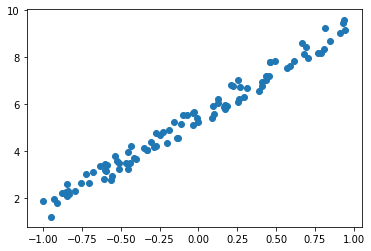

In [26]:
plt.scatter(x[:,0],y)

In [0]:
def mse(y_hat,y):
    return ((y_hat-y)**2).mean()

priming for sgd

In [0]:
#initialising parameters
a = torch.tensor([-1.,1.])

In [0]:
y_hat = x@a

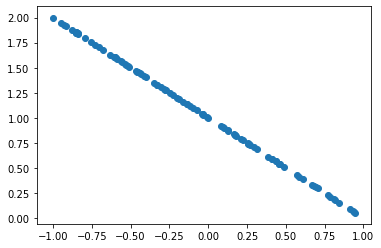

In [41]:
plt.scatter(x[:,0],y_hat)

beginning sgd

In [50]:
a = torch.tensor(a,requires_grad=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [0]:
def update():
    y_hat = x@a
    loss = mse(y,y_hat)
    if t%20==0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr*a.grad)
        a.grad.zero_()

In [53]:
for t in range(100): update()

tensor(23.8751, grad_fn=<MeanBackward0>)
tensor(0.8486, grad_fn=<MeanBackward0>)
tensor(0.1522, grad_fn=<MeanBackward0>)
tensor(0.0907, grad_fn=<MeanBackward0>)
tensor(0.0852, grad_fn=<MeanBackward0>)


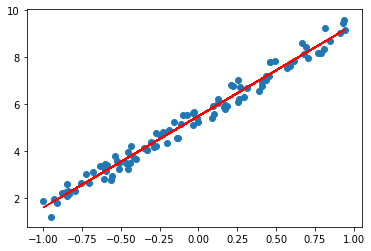

In [57]:
y_hat = x@a
plt.scatter(x[:,0],y)
plt.plot(x[:,0],y_hat,"r")

In [0]:
from matplotlib import animation, rc
rc('animation',html ='jshtml')

In [0]:
lr = 1

experiment with lr <br>
observe loss explosion for when lr >1

In [80]:
a = torch.tensor([-1.0,1.0],requires_grad=True)

fig = plt.figure()
plt.ylim((-20,20))
plt.scatter(x[:,0],y)
line, = plt.plot(x[:,0],x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig,animate,np.arange(0,100),interval=5)